In [90]:
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import OPTICS
import numpy as np
from sklearn.metrics import pairwise_distances
import pickle as pkl
import sklearn
from geopy import distance

from scipy.spatial.distance import cdist
from geopy.distance import distance as geodist

with open("jsondata.json") as f:
    js = json.load(f)

In [91]:
coords = [feat['geometry']['coordinates'] for feat in js['features']]
ble = [Point(c) for c in coords]
coords_np = np.array([c[::-1] for c in coords])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [106]:

df = gpd.GeoDataFrame(js['features'])

In [93]:
df

type                                           geometry  \
0      Feature  {'type': 'Point', 'coordinates': [106.73793792...   
1      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
2      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
3      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
4      Feature  {'type': 'Point', 'coordinates': [106.73940277...   
...        ...                                                ...   
56563  Feature  {'type': 'Point', 'coordinates': [6.148425, 52...   
56564  Feature  {'type': 'Point', 'coordinates': [-121.1986833...   
56565  Feature  {'type': 'Point', 'coordinates': [4.7368383333...   
56566  Feature  {'type': 'Point', 'coordinates': [4.7368533333...   
56567  Feature  {'type': 'Point', 'coordinates': [6.13842217, ...   

                                              properties  
0      {'photo_id': 56161, 'filename': 'https://olm-s...  
1      {'photo_id': 56162, 'filename': 'https://olm-s...  
2      {'photo_id': 56163, 'filename': 'https://olm-s...  
3      {'photo_id': 56164, 'filename': 'https://olm-s...  
4      {'photo_id': 56165, 'filename': 'https://olm-s...  
...                                                  ...  
56563  {'photo_id': 113446, 'filename': 'https://olm-...  
56564  {'photo_id': 113447, 'filename': 'https://olm-...  
56565  {'photo_id': 113448, 'filename': 'https://olm-...  
56566  {'photo_id': 113449, 'filename': 'https://olm-...  
56567  {'photo_id': 113450, 'filename': 'https://olm-...  

[56568 rows x 3 columns]

In [107]:

df['geometry'] = df.apply(lambda row: Point(row['geometry']['coordinates']), axis=1)


In [95]:
props = df['properties'].apply(pd.Series)

In [96]:
df2 = pd.concat([df, props], axis=1)

In [97]:
with_world = gpd.sjoin(df2, world, how='left').drop('properties', axis=1)

In [98]:
with_world

type                     geometry  photo_id  \
0      Feature   POINT (106.73794 10.79565)     56161   
1      Feature   POINT (106.73797 10.79567)     56162   
2      Feature   POINT (106.73797 10.79567)     56163   
3      Feature   POINT (106.73797 10.79567)     56164   
4      Feature   POINT (106.73940 10.79668)     56165   
...        ...                          ...       ...   
56563  Feature     POINT (6.14842 52.79217)    113446   
56564  Feature  POINT (-121.19868 36.48136)    113447   
56565  Feature     POINT (4.73684 52.48575)    113448   
56566  Feature     POINT (4.73685 52.48575)    113449   
56567  Feature     POINT (6.13842 52.79332)    113450   

                                                filename      model  \
0      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
1      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
2      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
3      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
4      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
...                                                  ...        ...   
56563  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...  iPhone XR   
56564  https://olm-s3.s3.eu-west-1.amazonaws.com/2020...   iPhone 8   
56565  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...   iPhone 6   
56566  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...   iPhone 6   
56567  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...  iPhone XR   

                  datetime        lat         lon  \
0      2020-01-05 12:15:17  10.795654  106.737938   
1      2020-01-05 12:15:27  10.795668  106.737968   
2      2020-01-05 12:15:32  10.795668  106.737968   
3      2020-01-05 12:15:43  10.795668  106.737968   
4      2020-01-05 12:17:52  10.796682  106.739403   
...                    ...        ...         ...   
56563  2021-01-02 13:14:36  52.792167    6.148425   
56564  2020-12-07 11:39:40  36.481358 -121.198683   
56565  2021-01-02 15:17:22  52.485755    4.736838   
56566  2021-01-02 15:17:20  52.485753    4.736853   
56567  2021-01-02 18:46:49  52.793317    6.138422   

                                   result_string  index_right      pop_est  \
0                                  other.dump 1,         94.0   96160163.0   
1                                  other.dump 1,         94.0   96160163.0   
2                                  other.dump 1,         94.0   96160163.0   
3                                  other.dump 1,         94.0   96160163.0   
4                                  other.dump 1,         94.0   96160163.0   
...                                          ...          ...          ...   
56563                       softdrinks.tinCan 1,        130.0   17084719.0   
56564                             other.metal 1,          4.0  326625791.0   
56565  softdrinks.energy_can 1,brands.redbull 1,        130.0   17084719.0   
56566  softdrinks.energy_can 1,brands.redbull 1,        130.0   17084719.0   
56567                          other.balloons 1,        130.0   17084719.0   

           continent                      name iso_a3  gdp_md_est  
0               Asia                   Vietnam    VNM    594900.0  
1               Asia                   Vietnam    VNM    594900.0  
2               Asia                   Vietnam    VNM    594900.0  
3               Asia                   Vietnam    VNM    594900.0  
4               Asia                   Vietnam    VNM    594900.0  
...              ...                       ...    ...         ...  
56563         Europe               Netherlands    NLD    870800.0  
56564  North America  United States of America    USA  18560000.0  
56565         Europe               Netherlands    NLD    870800.0  
56566         Europe               Netherlands    NLD    870800.0  
56567         Europe               Netherlands    NLD    870800.0  

[56568 rows x 15 columns]

In [ ]:
base = world.plot(color='white', edgecolor='black')
df.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()



In [12]:
with open("data.pkl.gz", "wb") as f:
    pkl.dump(with_world, f)

In [13]:
uk = with_world[with_world['name'] == "United Kingdom"]

In [14]:
uk.count()

type             26990
geometry         26990
photo_id         26990
filename         26990
model            26990
datetime         26990
lat              26990
lon              26990
result_string    26990
index_right      26990
pop_est          26990
continent        26990
name             26990
iso_a3           26990
gdp_md_est       26990
dtype: int64

In [15]:
uk_geo = uk['geometry'].tolist()

In [16]:
uk_x_y = [[pt.x, pt.y] for pt in uk_geo]

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
from geopy import distance
from sklearn.metrics import pairwise_distances
from math import radians
uk_x_y_radians = np.array([[radians(_) for _ in pt] for pt in uk_x_y])


# clustering = DBSCAN(min_samples=2, metric=lambda p1, p2: distance.distance(p1, p2, ellipsoid='WGS-84').meters).fit(uk_x_y)

In [30]:
distances = pairwise_distances(uk_x_y_radians, metric="haversine")

In [31]:
with open("haversine_distances.pkl.gz", "wb") as f:
    pkl.dump(distances, f)

In [32]:
in_meters = distances * 6371000

In [38]:
clustering = DBSCAN(min_samples=5, eps=10, metric='precomputed').fit(in_meters)

In [39]:
np.unique(clustering.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [43]:
uk['cluster'] = clustering.labels_

In [49]:
uk.to_pickle("uk.pkl.gz")

<AxesSubplot:>

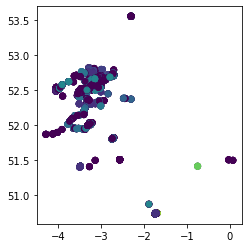

In [54]:
uk2.plot(c=uk['cluster'])

In [68]:
# %load_ext autoreload
# %autoreload 2

import plotly.express as px
uk = pd.read_pickle("uk.pkl.gz")
uk2 = uk[uk['cluster'] != -1]
uk2['loc'] = uk2.apply(lambda row: [row["geometry"].y, row['geometry'].x], axis=1)

In [87]:
uk2['label'] = uk2['cluster'].astype(str)
fig = px.scatter_mapbox(uk2, color="label", mapbox_style="open-street-map",
    lat=uk2.geometry.y,
    lon=uk2.geometry.x
)


In [ ]:
uk['label'] = uk2['cluster'].astype(str)
fig = px.scatter_mapbox(uk2, color="label", mapbox_style="open-street-map",
    lat=uk2.geometry.y,
    lon=uk2.geometry.x
)

In [67]:
uk2['loc']

34          [-3.4805949999999997, 51.406655]
35          [-3.48059167, 51.40680332999999]
36            [-3.480625, 51.40688333000001]
39        [-3.4806166700000007, 51.40697833]
40                  [-3.480625, 51.40700833]
                        ...                 
56307             [-1.7362, 50.727416666667]
56308    [-1.7361916666667, 50.727444444444]
56309    [-1.7358305555556, 50.727638888889]
56310    [-1.7354027777778, 50.728011111111]
56311    [-1.7366305555556, 50.728233333333]
Name: loc, Length: 17425, dtype: object

In [88]:
fig.show(renderer='browser')

In [71]:
fig.show()